# Detecting Dwarf Galaxies: The Performance & Limitations of Various Density Estimators

### Nicolas Garavito, Jennifer Kadowaki, Matt Kirby, Ben Lew, Ragadeepika Pucha

## Dwarf Galaxies - Why are they important?

- The $\Lambda$-CDM model of structure formation has many issues in the low-mass scales: The Missing Satellites Problem, Too Big to Fail Problem.
- Study of Dwarf Galaxies will help in solving these problems.
- Dwarf Galaxies are building blocks of galaxy formation and evolution.
- Study of Environmental factors in the growth of galaxies.
- Study of Reionization in the growth of galaxies.

## Detection of Dwarf Galaxies

- Before SDSS, only a few dwarf galaxies were known. 
- SDSS revolutionized the field with the detection of more and more dwarf galaxies - especially ultra-faint galaxies.
- Depth of SDSS (~24 mag). The upcoming large surveys (LSST) are going to map the sky much deeper - Need some method to detect dwarf galaxies.
- The easiest direct method is finding over-densities of resolved stars.

## Outline of the Project

- Getting SDSS data of known dwarf galaxies using SQL queries.
- Applying Different Density Estimators to each of them.
- Applying the Different Estimators to simulated data.
- Conclusions

## Getting the SDSS Data - 

- SQL Query : 
@ Matt, please add the query.

- Dwarf Galaxies Considered - 
    * Leo II ($M_{V}$ = -9.8, $r_{h}$ = 176 pc, ${\mu}_{V}$ = 24.2)
    * Draco ($M_{V}$ = -8.8, $r_{h}$ = 221 pc, ${\mu}_{V}$ = 25.0)
    * Willman I ($M_{V}$ = -2.7, $r_{h}$ = 25 pc, ${\mu}_{V}$ = 26.1)
    * Segue ($M_{V}$ = -1.5, $r_{h}$ = 29 pc, ${\mu}_{V}$ = 27.6)

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import sys

In [2]:
sys.path.append('../code/')
import density_functions
from density_tools import density_peaks

In [3]:
font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

In [46]:
## reading the data
def read_data(data):
    """
    Reads the fits data   """
    h = fits.open(data)
    t = h[1].data
    ra = t['ra']
    dec = t['dec']
    return ra, dec

In [40]:
sdss_data = ['draco.fits', 'leo2.fits', 'segue.fits', 'willman1.fits']
gal_name = ['Draco', 'Leo II', 'Segue', 'Willman I' ]
mock_data = ['test_field.fits', 'test_field1.fits']

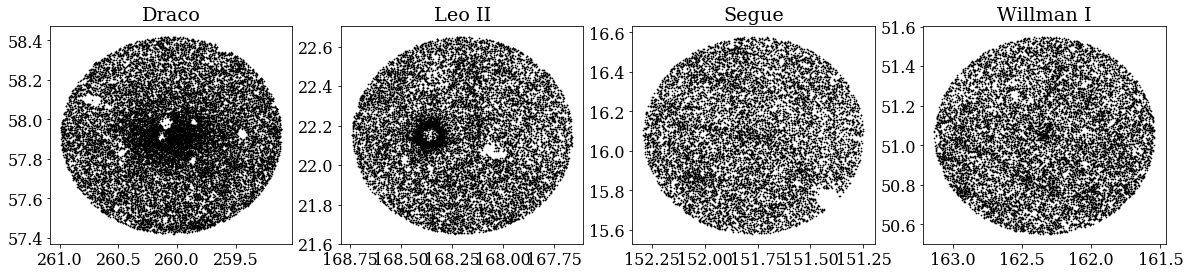

In [51]:
plt.figure(figsize = (20, 4))
k=0
for name in sdss_data:
    ra, dec = read_data('../data/sdss_fields/'+name)
    plt.subplot2grid((1,4), (0,k))
    plt.title(gal_name[k])
    
    plt.scatter(ra, dec, c = 'k', s = 0.5)
    plt.gca().invert_xaxis()
    
    k+=1

## Various Density Estimators - 

- Nearest Neighbor Density Estimator
- Kernel Density Estimator (Gaussian Kernels)
- Kernel Density Estimator (Top-Hat Kernels)
- Kernel Density Estimator (Exponential Kernels)
- Gaussian Mixture Model
- Two-point Correlation Funtion

In [28]:
## 

def overdensities(dens, sigma_min, sigma_max, xmin=0, xmax=1, ymin=0, ymax=1):
    # Defining grid
    x = np.linspace(xmin, xmax, np.shape(dens)[0])
    y = np.linspace(ymin, ymax, np.shape(dens)[1])
    X, Y = np.meshgrid(x, y)

    # Defining sigma as the standard deviation of the data
    sigma = np.std(dens.flatten())
    # Finding the median of the all the data in the field
    dens_median = np.median(dens.flatten())
    # Defining the contours range.·
    overdensities = []
    color_bar_labels = []

    for i in range(sigma_min, sigma_max+1):
        overdensities.append(dens_median + i*sigma)
        color_bar_labels.append(str(i) + '$\sigma$')
    #print(color_bar_labels)
    
    return X, Y, overdensities, color_bar_labels

## Nearest Neighbour Density Estimator 

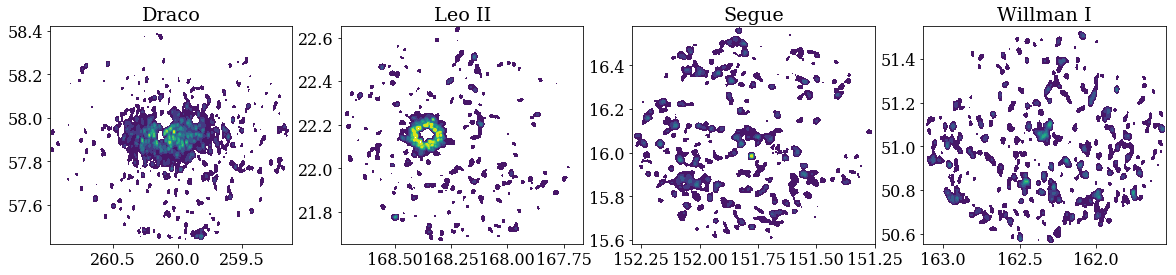

In [44]:
plt.figure(figsize = (20, 4))
k=0
for name in sdss_data:
    ra, dec = read_data('../data/sdss_fields/'+name)
    dens_field_NN = density_functions.NN_bayesian_density(ra, dec, 20, 500)
    
    X_NN, Y_NN, overdens_NN, colorbar_NN = overdensities(dens_field_NN, 1, 10, xmin=min(ra), xmax=max(ra), ymin=min(dec), ymax=max(dec))
    plt.subplot2grid((1,4), (0, k))
    plt.title(gal_name[k])
    plt.contourf(X_NN, Y_NN, dens_field_NN, overdens_NN)
    plt.gca().invert_xaxis()
    
    k+=1
    

## Kernel Density Estimator (Guassian Kernel)



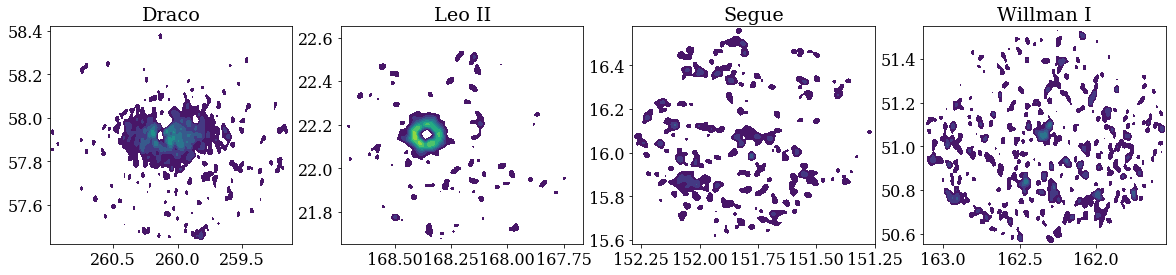

In [45]:
plt.figure(figsize = (20, 4))
k=0
for name in sdss_data:
    ra, dec = read_data('../data/sdss_fields/'+name)
    dens_field_KDE_gaussian = density_functions.KDE(ra,dec, kernel = 'gaussian')
    
    X_KDE_gaussian, Y_KDE_gaussian, overdens_KDE_gaussian, colorbar_KDE_exp = overdensities(dens_field_KDE_gaussian, 1, 10, xmin=min(ra), xmax=max(ra), ymin=min(dec), ymax=max(dec))    
    plt.subplot2grid((1,4), (0, k))
    plt.title(gal_name[k])
    plt.contourf(X_KDE_gaussian, Y_KDE_gaussian, dens_field_KDE_gaussian, overdens_KDE_gaussian)
    plt.gca().invert_xaxis()
    
    k+=1

## Kernel Density Estimator (Top-Hat Kernel)

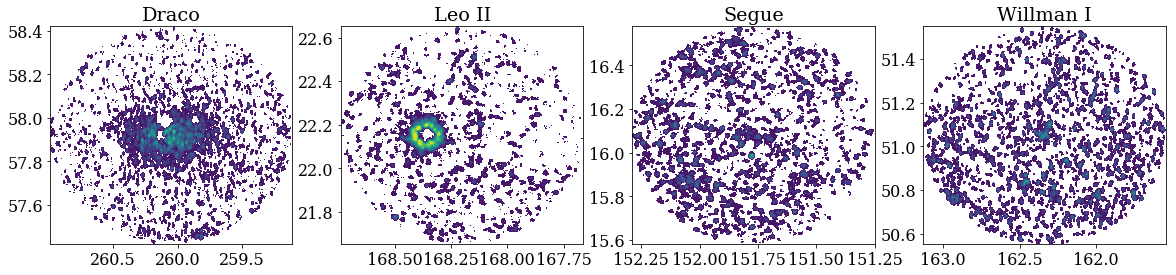

In [52]:
plt.figure(figsize = (20, 4))
k=0
for name in sdss_data:
    ra, dec = read_data('../data/sdss_fields/'+name)
    dens_field_KDE_th = density_functions.KDE(ra,dec, kernel = 'tophat') 
    
    X_KDE_th, Y_KDE_th, overdens_KDE_th, colorbar_ = overdensities(dens_field_KDE_th, 1, 10, xmin=min(ra), xmax=max(ra), ymin=min(dec), ymax=max(dec))
    plt.subplot2grid((1,4), (0, k))
    plt.title(gal_name[k])
    plt.contourf(X_KDE_th, Y_KDE_th, dens_field_KDE_th, overdens_KDE_th)
    plt.gca().invert_xaxis()
    
    k+=1

## Kernel Density Estimator (Exponential Kernels)

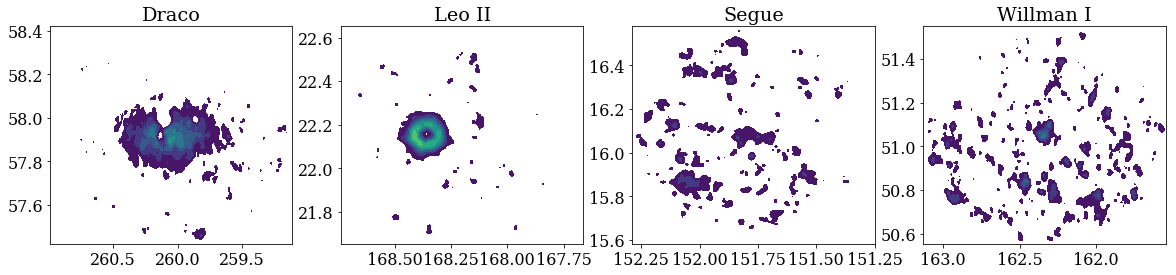

In [53]:
plt.figure(figsize = (20, 4))
k=0
for name in sdss_data:
    ra, dec = read_data('../data/sdss_fields/'+name)
    dens_field_KDE_exponential = density_functions.KDE(ra,dec, kernel = 'exponential')
    
    X_KDE_exp, Y_KDE_exp, overdens_KDE_exp, colorbar_NN = overdensities(dens_field_KDE_exponential, 1, 10, xmin=min(ra), xmax=max(ra), ymin=min(dec), ymax=max(dec))    
    plt.subplot2grid((1,4), (0, k))
    plt.title(gal_name[k])
    plt.contourf(X_KDE_exp, Y_KDE_exp, dens_field_KDE_exponential, overdens_KDE_exp)
    plt.gca().invert_xaxis()
    
    k+=1
    

## Gaussian Mixture Model

## Two-Point Correlation Function

## Comparison of Different Estimators

In [ ]:
#figure = figsize(10, 10)
## To do 
## revere RA
## colorbar
## fix titles
## repeat for test and scatter plots
fig, axes = plt.subplots(4, 4, figsize=(12.5,12.5))
k=0
for name in sdss_data:
    print(name)
    ra, dec = read_data('../data/sdss_fields/'+name)
    dens_field_NN = density_functions.NN_bayesian_density(ra, dec, 20, 500)
    dens_field_KDE_gaussian = density_functions.KDE(ra,dec, kernel = 'gaussian')
    dens_field_KDE_th = density_functions.KDE(ra,dec, kernel = 'tophat')
    dens_field_KDE_exponential = density_functions.KDE(ra,dec, kernel = 'exponential')
    
    
    X_NN, Y_NN, overdens_NN, colorbar_NN = overdensities(dens_field_NN, 1, 10, xmin=min(ra), xmax=max(ra), ymin=min(dec), ymax=max(dec))
    X_KDE_gaussian, Y_KDE_gaussian, overdens_KDE_gaussian, colorbar_KDE_exp = overdensities(dens_field_KDE_gaussian, 1, 10, xmin=min(ra), xmax=max(ra), ymin=min(dec), ymax=max(dec))
    X_KDE_th, Y_KDE_th, overdens_KDE_th, colorbar_ = overdensities(dens_field_KDE_th, 1, 10, xmin=min(ra), xmax=max(ra), ymin=min(dec), ymax=max(dec))
    X_KDE_exp, Y_KDE_exp, overdens_KDE_exp, colorbar_NN = overdensities(dens_field_KDE_exponential, 1, 10, xmin=min(ra), xmax=max(ra), ymin=min(dec), ymax=max(dec))

    axes[0][0].set_title('NN')
    axes[0][1].set_title('KDE Gaussian')
    axes[0][2].set_title('KDE Top Hat')
    axes[0][3].set_title('KDE Exponential')

    axes[k][0].contourf(X_NN, Y_NN, dens_field_NN, overdens_NN)
    axes[k][1].contourf(X_KDE_gaussian, Y_KDE_gaussian, dens_field_KDE_gaussian, overdens_KDE_gaussian)
    axes[k][2].contourf(X_KDE_th, Y_KDE_th, dens_field_KDE_th, overdens_KDE_th)
    axes[k][3].contourf(X_KDE_exp, Y_KDE_exp, dens_field_KDE_exponential, overdens_KDE_exp)

    k+=1

    #xlim(min(ra), max(ra))
    #k+=1

## Simulated Data



## Conclusions